# __Análise de componentes principais - PCA__
### __Analisando as músicas populares no TikTok__

Nessa parte do trabalho, iremos utilizar o algoritmo de análise de componentes principais sobre o banco de dados de músicas populares no TikTok, em busca de identificar os atributos que explicam a maior parte da variância dos dados. O método de análise de dados via PCA é particularmente útil quando variáveis no dataset são altamente correlacionadas, de forma que haja uma redundância de dados. Isso acontece no dataframe: as colunas de danceability e livenesse e tempo são intrisicamente relacionadas, por exemplo. Assim, aqui o PCA será usado como tentativa de reduzir o número de variáveis na análise de dados.

#### __Referências:__  
Videoaulas de PCA do professor Fabrício Muirai, da disciplina de Álgebra Linear Computacional:

https://www.youtube.com/watch?v=hlaLh-chsyE

https://www.youtube.com/watch?v=qqo_4p3vBr8&t=1016s

Aula da professora Cibele Russo, da USP: 

https://www.youtube.com/watch?v=u8th43VOyCw

In [20]:
#importando bibliotecas
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
#importando a base de dados
df = pd.read_csv('../data/numeric_columns.csv')

#removendo algumas colunas
del df['duration']
del df['mode']

#colocando a coluna de popularidade no final da tabela
new_cols = [col for col in df.columns if col != 'popularity'] + ['popularity']
df = df[new_cols]

df.head()

,track_id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year,popularity
0,6kVuF2PYLuvl9T85XjNbaO,0.597,0.800,1,-5.423,0.3120,0.0461,0.000000,0.1800,0.565,155.932,5.036433,2011,28
1,1RGIjMFMgJxkZHMDXVYzOJ,0.832,0.391,8,-8.504,0.0628,0.0564,0.000000,0.2240,0.436,104.961,3.980000,2007,75
2,1dIWPXMX4kRHj6Dt2DStUQ,0.571,0.767,2,-5.160,0.2870,0.3360,0.000000,0.0809,0.605,93.421,2.694733,2020,76
3,4QVS8YCpK71R4FsxSMCjhP,0.548,0.839,6,-2.371,0.0644,0.1350,0.000000,0.1020,0.314,98.932,3.638250,2018,72
4,7BoobGhD4x5K96Me0hqC8Q,0.855,0.463,3,-7.454,0.0367,0.2170,0.000018,0.3470,0.866,102.931,2.046200,2021,89


As variáveis que serão analisada são: dancabilidade, enegia, tom, altura, speechiness, acusticidade, instrumentalidade, liveness, valência, tempo, duração em minutos e ano de lançamento. 

In [22]:
#tranformando o df em matrix
db_matrix = np.matrix(df.iloc[:, 1:13])
db_matrix

matrix([[5.97000000e-01, 8.00000000e-01, 1.00000000e+00, ...,
         1.55932000e+02, 5.03643333e+00, 2.01100000e+03],
        [8.32000000e-01, 3.91000000e-01, 8.00000000e+00, ...,
         1.04961000e+02, 3.98000000e+00, 2.00700000e+03],
        [5.71000000e-01, 7.67000000e-01, 2.00000000e+00, ...,
         9.34210000e+01, 2.69473333e+00, 2.02000000e+03],
        ...,
        [7.70000000e-01, 8.82000000e-01, 8.00000000e+00, ...,
         9.99910000e+01, 3.72538333e+00, 2.01900000e+03],
        [5.64000000e-01, 7.14000000e-01, 7.00000000e+00, ...,
         1.75924000e+02, 3.40021667e+00, 2.01600000e+03],
        [7.91000000e-01, 7.33000000e-01, 9.00000000e+00, ...,
         1.59974000e+02, 2.93021667e+00, 2.02000000e+03]])

In [23]:
from sklearn.preprocessing import StandardScaler

#normalizando os dados
db_matrix = np.asarray(db_matrix)
matrix_norm = StandardScaler().fit_transform(db_matrix)

#agora a média de todas as colunas é praticamente zero
matrix_norm.mean(0)

array([ 5.50234136e-16,  6.82501958e-16, -7.23064090e-17,  7.05428380e-18,
       -1.26977108e-16,  1.41085676e-17, -4.23257028e-17,  1.05814257e-17,
        4.72637015e-16, -1.55194244e-16, -1.34031392e-16,  1.44612818e-14])

In [24]:
matrix_norm = np.asarray(matrix_norm)

In [25]:
#importando o módulo de PCA
from sklearn.decomposition import PCA

#primeiro, vamos observar todos componentes principais 
pca = PCA(n_components = 12)

Ao aplicar o algoritmo de PCA na base de dados de músicas populares no TikTok, nosso objetivo é conseguir identificar grupos distintos entre as músicas que fazem sucesso nessa rede. Por exemplo, há músicas que ficam famosas no TikTok por causa de uma dança, há outras são usadas para fazer uma determinada trend de vídeos não relacionada a dança, com as que são dubladas em vídeos de maquiagem, ou em homenagens, por exemplo. Como usuários do TikTok, percebemos de forma empírica que há uma distinção das músicas que fazem sucesso em cada "nicho"/trend da rede, e aqui queremos confirmar se está impressão é correta ou não.

In [26]:
#rodando o PCA
pca.fit(matrix_norm)

PCA(n_components=12)

In [27]:
#componentes obtidos
np.round(pca.explained_variance_ratio_,3)

array([0.19 , 0.139, 0.104, 0.089, 0.085, 0.082, 0.081, 0.065, 0.055,
       0.052, 0.039, 0.02 ])

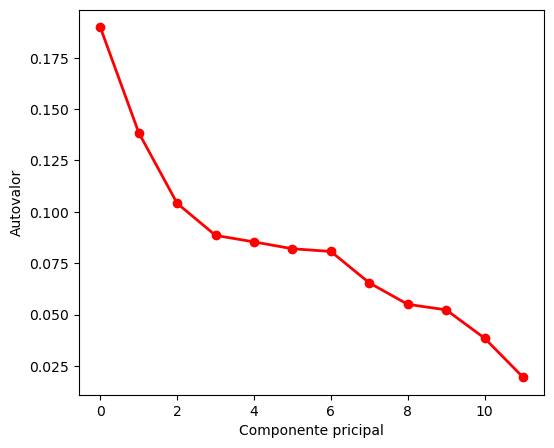

In [28]:
fig = plt.figure(figsize=(6, 5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Componente pricipal')
plt.ylabel('Autovalor')

plt.show()

Agora vamos verificando a soma cumulativa dos componentes, para saber quanto componentes principais usar na análise final.

In [29]:
#soma cumulativa dos componentes
pca.explained_variance_ratio_.cumsum()

array([0.18985113, 0.32839216, 0.43253127, 0.5210731 , 0.60644854,
       0.68848616, 0.76921014, 0.83465471, 0.88965126, 0.94195586,
       0.98048133, 1.        ])

A partir desse resultado, concluímos que pelo menos 5 componentes principais devem ser usadas para explicar cerca de 60% da variabilidade dos dados.

In [30]:
#rodando agora o pca para 5 componentes
pca = PCA(n_components = 5)
pca.fit(matrix_norm)
pca.components_

array([[-0.17947597, -0.57367972, -0.06178351, -0.52271817,  0.03281353,
         0.43788878,  0.06258004, -0.1041846 , -0.36190369, -0.14665617,
         0.00442902,  0.03914765],
       [-0.4655848 ,  0.15125247,  0.03107577,  0.1377334 , -0.52139693,
         0.12336445,  0.08986645,  0.12483795, -0.11418474, -0.12918677,
         0.5048772 , -0.3808607 ],
       [ 0.43622381, -0.16861413,  0.05342   , -0.18667439,  0.08292539,
         0.06831315, -0.14125511, -0.25612042,  0.48074129, -0.20259123,
         0.32253916, -0.51990013],
       [ 0.23890692,  0.08319995,  0.23983245,  0.0428687 , -0.3572493 ,
         0.09579674,  0.61337221, -0.20134142,  0.10461123, -0.46783313,
        -0.21598823,  0.21590215],
       [-0.09500965, -0.02177438,  0.63151609, -0.17373337,  0.15023124,
        -0.00285068,  0.39881456, -0.03650005,  0.06155999,  0.5914551 ,
         0.08735188, -0.13153405]])

Agora iremos alterar os valores da coluna de popularidade para melhor visualização do resultado do PCA. Assim, a classificação por popularidade na tabela será divida em quatros grupos, são eles:

1. Popularidade no intervalo [0, 25]: 1

2. Popularidade no intervalo (25, 50]: 2

3. Popularidade no intervalo (50, 75]: 3

4. Popularidade no intervalo (75, 100]: 4

In [31]:
#mudando os valores 
df.loc[df["popularity"] <= 25, "popularity"] = 1
df.loc[(df["popularity"] > 25) & (df["popularity"] <= 50), "popularity"] = 2
df.loc[(df["popularity"] > 50) & (df["popularity"] <= 75), "popularity"] = 3
df.loc[(df["popularity"] > 75) & (df["popularity"] <= 100), "popularity"] = 4

In [32]:
import plotly.express as px

#visualizando resultados

components = pca.fit_transform(matrix_norm)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=df["popularity"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

__Resultado:__ Não é possível enxergar grupos distintos entre as músicas que fazem sucesso no TikTok. Usando os ranges de popularidade, vemos que as músicas mais e menos populares dentro desse grupo tem pouca diferença entre si. Desse resultado, há duas possíveis conclusões:

1. A representação comprimida dos dados via PCA não tem qualidade suficiente para ser um classificador entre as músicas que hitam no TikTok. Ou seja, há a possibildiade de outro tipo de análise conseguir identificar uma diferença entre as músicas do grupo estudado. 

2. Na base utilizada não há caracterísitcas marcantes o suficiente para poder dividí-la em grupos distintos.